In [110]:
# 필요 라이브러리 로드
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

In [111]:
day_df = pd.read_csv('usage_by_weather2.csv')
day_df

,Unnamed: 0,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


In [112]:
day_df = day_df.drop(columns=['Unnamed: 0'])
day_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


In [113]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   wh              730 non-null    float64
 10  kwh             730 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 62.9 KB


In [114]:
day_df.isnull().sum()

year              0
month             0
day               0
temp              0
cloud             0
rainfall_total    0
Humidity_mean     0
solar             0
customer          0
wh                0
kwh               0
dtype: int64

Text(0.5, 1.0, '날짜와 전력 상관관계')

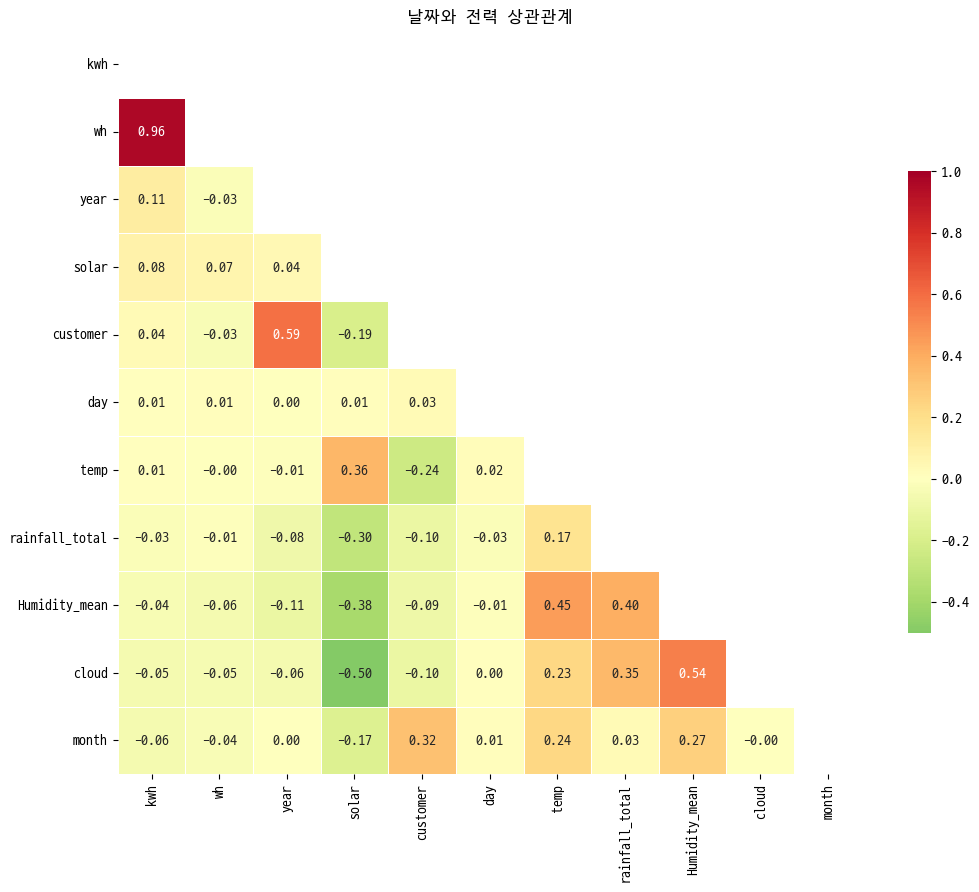

In [115]:
kw_matrix = day_df.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날짜와 전력 상관관계")

In [116]:
day_df2 = day_df.drop(columns=['wh'])

Text(0.5, 1.0, '날짜와 전력 상관관계')

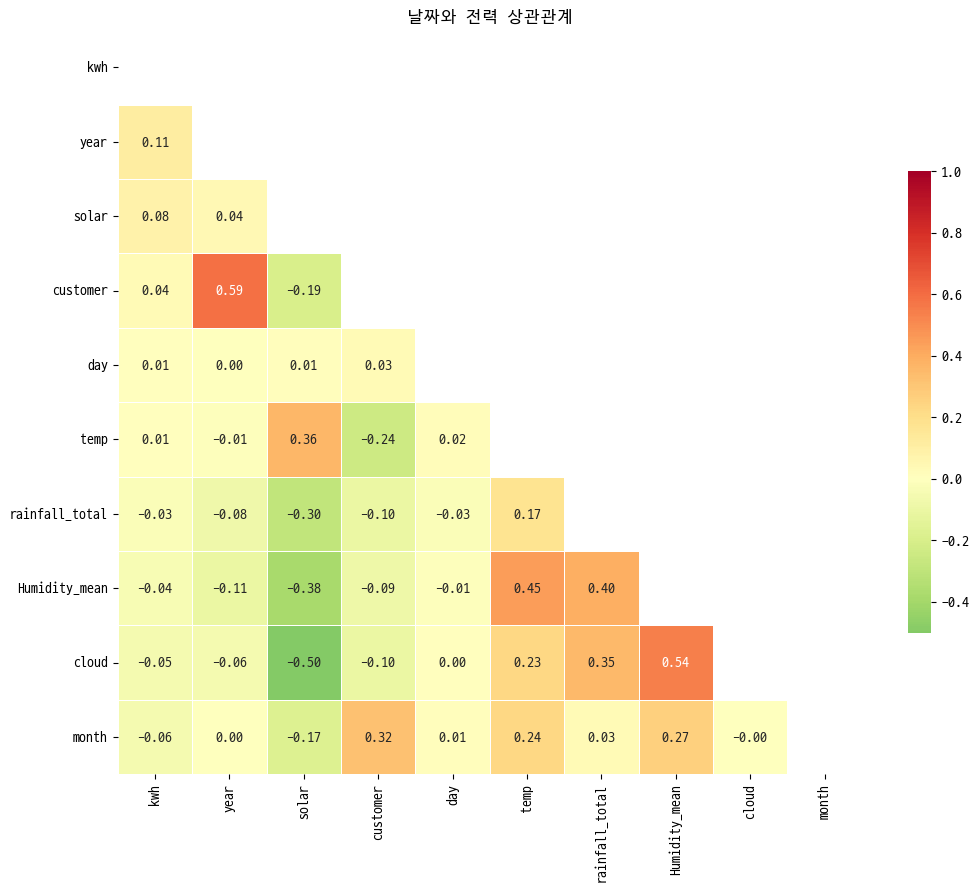

In [117]:
kw_matrix = day_df2.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날짜와 전력 상관관계")

In [118]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [119]:
day_df_corr = day_df.corr()
day_df_corr_sort = day_df_corr.sort_values('kwh', ascending=False)
day_df_corr_sort.head(10)

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
kwh,1.134049e-01,-5.988557e-02,6.852874e-03,0.006488,-0.053380,-0.025037,-0.044401,0.081395,0.037154,0.963447,1.000000
wh,-2.557046e-02,-3.702866e-02,1.155362e-02,-0.001221,-0.050187,-0.014554,-0.055083,0.066058,-0.034775,1.000000,0.963447
year,1.000000e+00,7.923551e-13,9.339728e-14,-0.014896,-0.056904,-0.082066,-0.106679,0.041920,0.593909,-0.025570,0.113405
solar,4.191976e-02,-1.712911e-01,8.487703e-03,0.363903,-0.502836,-0.295780,-0.381615,1.000000,-0.194289,0.066058,0.081395
customer,5.939094e-01,3.194481e-01,3.432629e-02,-0.243509,-0.100264,-0.100059,-0.091347,-0.194289,1.000000,-0.034775,0.037154
day,9.339728e-14,1.189318e-02,1.000000e+00,0.018880,0.002274,-0.026867,-0.012421,0.008488,0.034326,0.011554,0.006853
temp,-1.489575e-02,2.364771e-01,1.888007e-02,1.000000,0.234163,0.173773,0.449717,0.363903,-0.243509,-0.001221,0.006488
rainfall_total,-8.206610e-02,3.336828e-02,-2.686715e-02,0.173773,0.348429,1.000000,0.395061,-0.295780,-0.100059,-0.014554,-0.025037
Humidity_mean,-1.066792e-01,2.661744e-01,-1.242073e-02,0.449717,0.540440,0.395061,1.000000,-0.381615,-0.091347,-0.055083,-0.044401
cloud,-5.690377e-02,-2.294342e-03,2.274415e-03,0.234163,1.000000,0.348429,0.540440,-0.502836,-0.100264,-0.050187,-0.053380


In [120]:
day_df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'wh', 'kwh'],
      dtype='object')

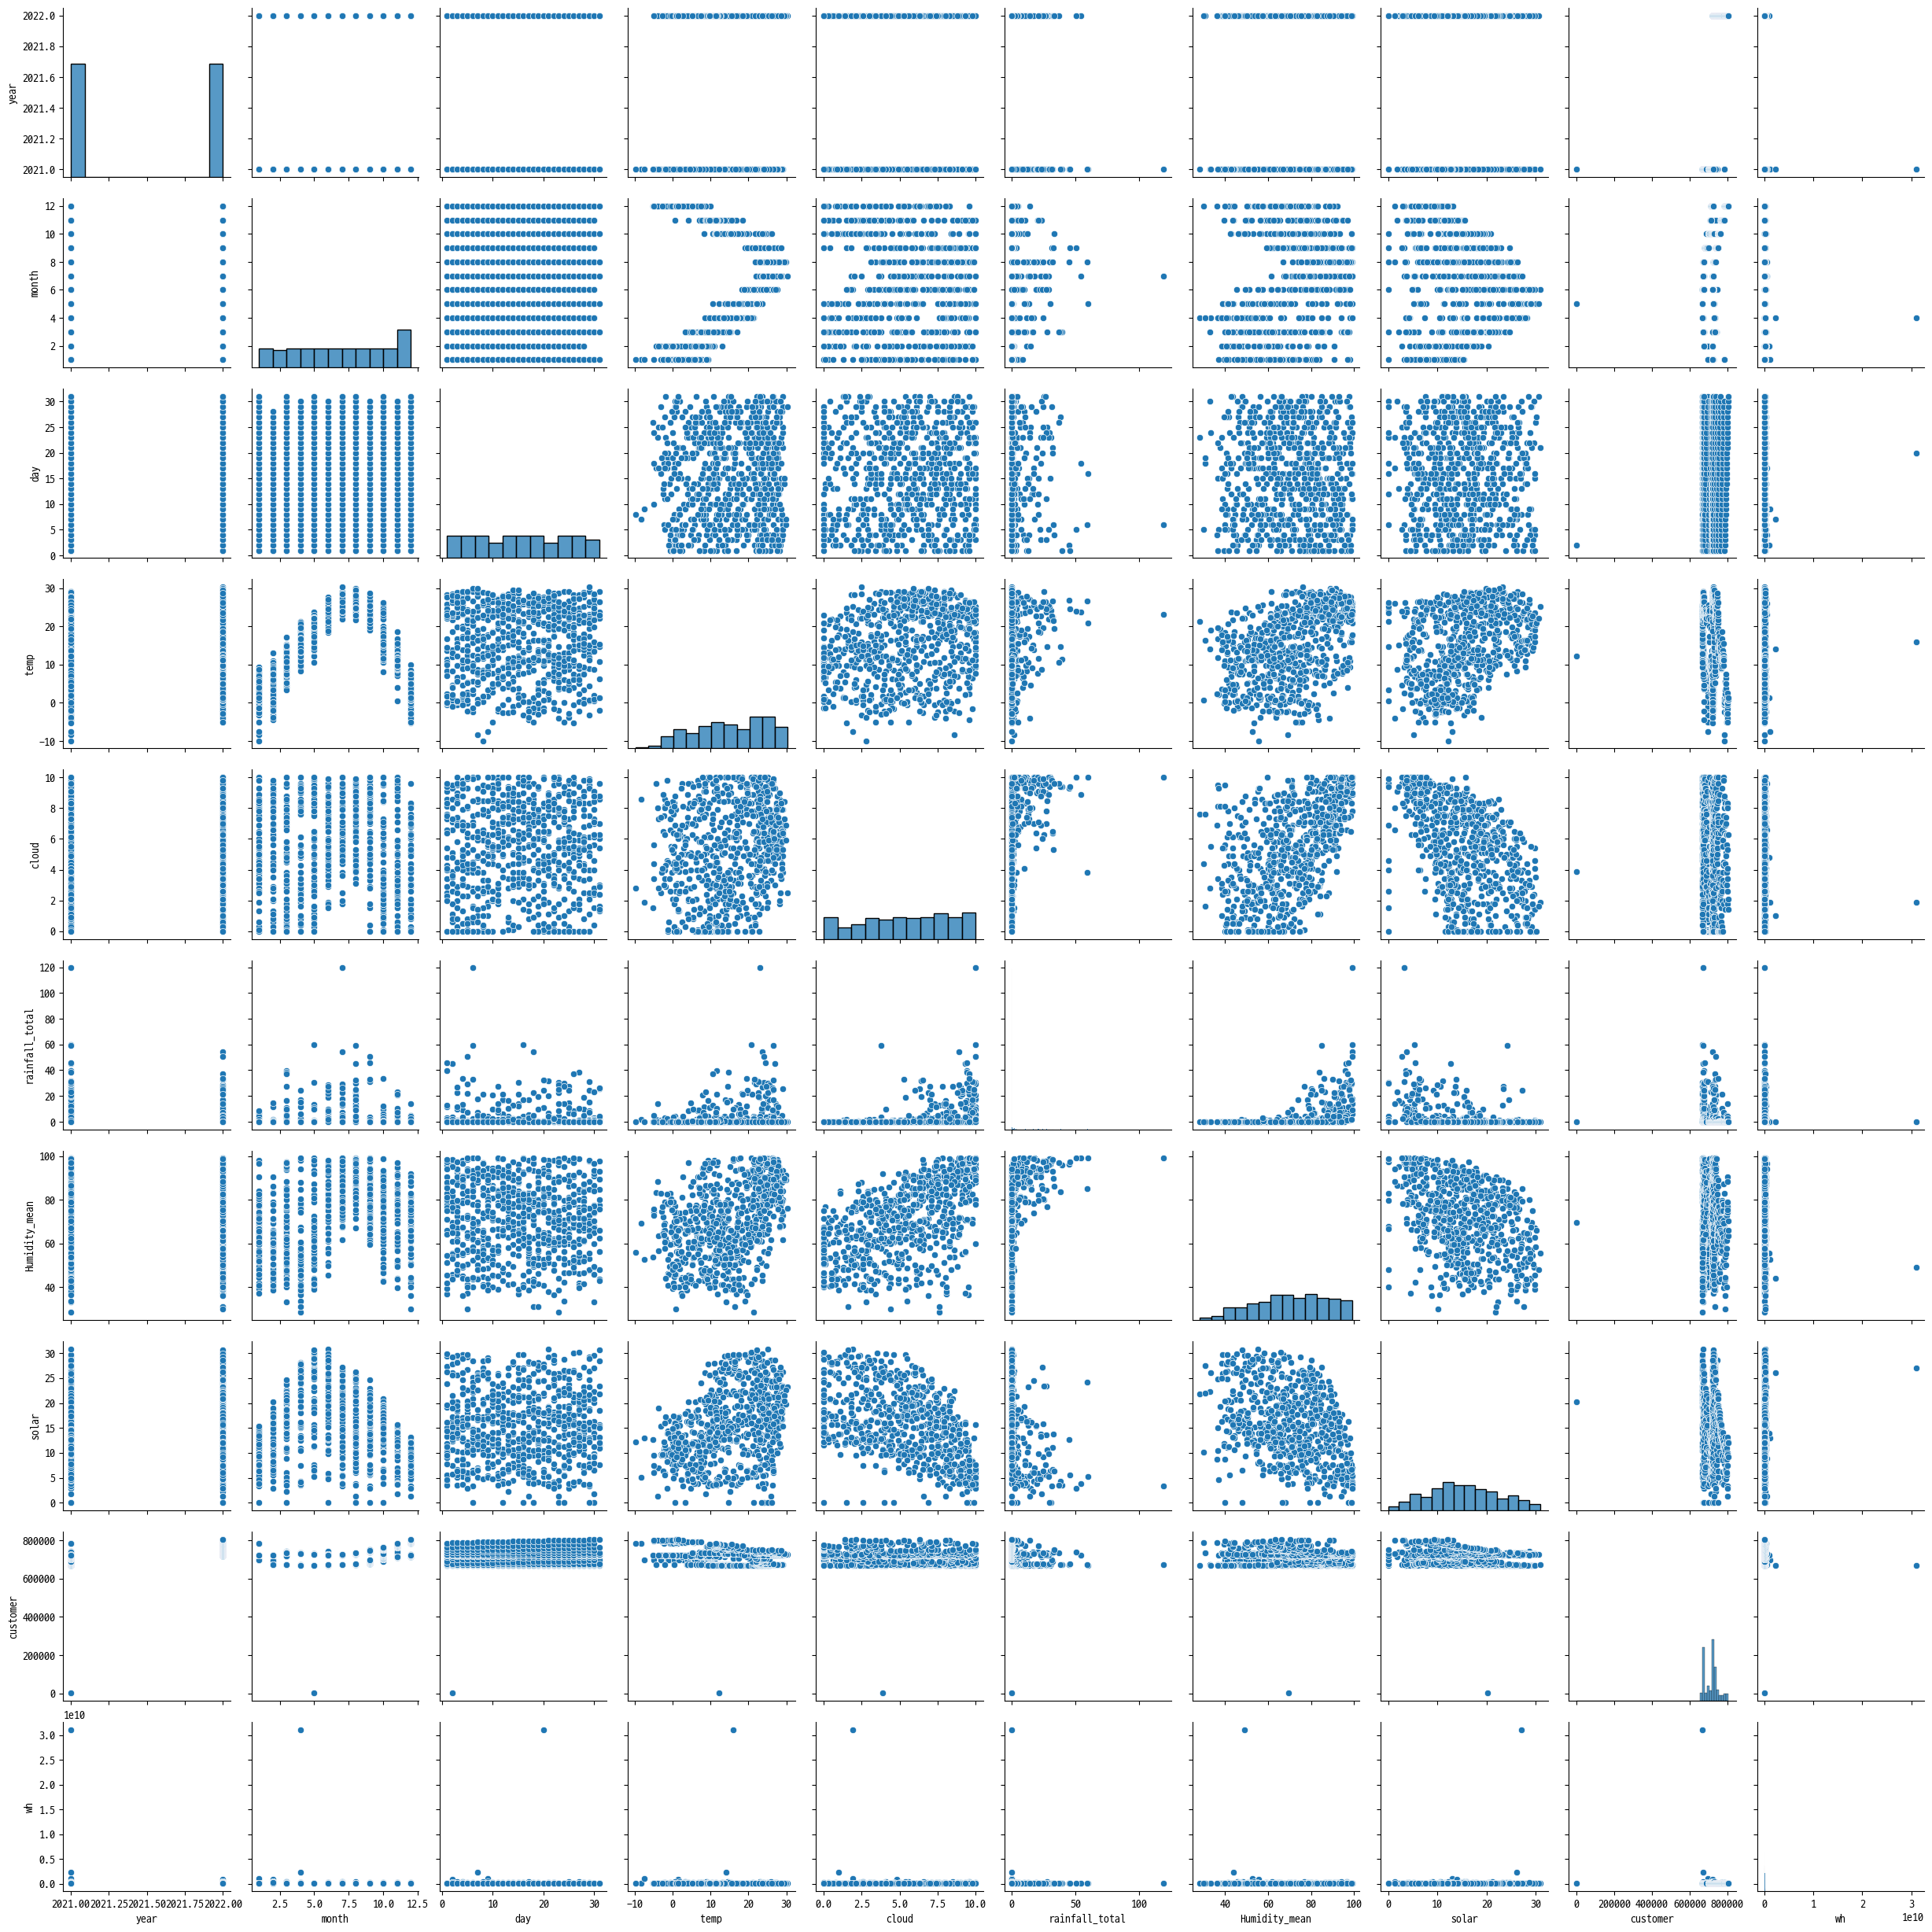

In [121]:
cols = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'wh']
sns.pairplot(day_df[cols])
plt.show()

In [122]:
cols_train = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer','wh']
X_train_pre = day_df[cols_train]
y = day_df['kwh'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [123]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                110       
                                                                 
 dense_49 (Dense)            (None, 30)                330       
                                                                 
 dense_50 (Dense)            (None, 40)                1240      
                                                                 
 dense_51 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [125]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=400)

modelpath = 'kw_day_weather1.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=4000, batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/4000
14/14 [==============================] - 1s 16ms/step - loss: 505723976941568.0000 - val_loss: 1227812904108032.0000
Epoch 2/4000
14/14 [==============================] - 0s 3ms/step - loss: 161382171410432.0000 - val_loss: 12789154182070272.0000
Epoch 3/4000
14/14 [==============================] - 0s 3ms/step - loss: 131015578222592.0000 - val_loss: 25474400220348416.0000
Epoch 4/4000
14/14 [==============================] - 0s 3ms/step - loss: 133836289605632.0000 - val_loss: 19434716276981760.0000
Epoch 5/4000
14/14 [==============================] - 0s 3ms/step - loss: 129654576906240.0000 - val_loss: 18619860049199104.0000
Epoch 6/4000
14/14 [==============================] - 0s 3ms/step - loss: 129444618436608.0000 - val_loss: 22161032667463680.0000
Epoch 7/4000
14/14 [==============================] - 0s 3ms/step - loss: 136576269025280.0000 - val_loss: 28917630404395008.0000
Epoch 8/4000
14/14 [==============================] - 0s 3ms/step - loss: 122355774914560.

In [128]:
real_kwh = []
pred_kwh = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh.append(real)
    pred_kwh.append(prediction)
    n_iter += 1
    X_num.append(n_iter)


5/5 [==============================] - 0s 2ms/step
실제 전력 : 10636186.02, 예상전력 : 11779449.00
실제 전력 : 14118898.70, 예상전력 : 15695989.00
실제 전력 : 10988331.94, 예상전력 : 11059063.00
실제 전력 : 15989710.92, 예상전력 : 19132428.00
실제 전력 : 12719199.07, 예상전력 : 11502255.00
실제 전력 : 22162817.07, 예상전력 : 19645894.00
실제 전력 : 12663186.49, 예상전력 : 12822721.00
실제 전력 : 23124764.23, 예상전력 : 20064008.00
실제 전력 : 12911894.91, 예상전력 : 15152295.00
실제 전력 : 10499231.76, 예상전력 : 11693481.00
실제 전력 : 9516881.62, 예상전력 : 10478249.00
실제 전력 : 14289218.09, 예상전력 : 17095942.00
실제 전력 : 14356240.83, 예상전력 : 14023772.00
실제 전력 : 11415963.93, 예상전력 : 14987448.00
실제 전력 : 18356953.52, 예상전력 : 15846115.00
실제 전력 : 18703829.40, 예상전력 : 16749188.00
실제 전력 : 13897061.90, 예상전력 : 12877769.00
실제 전력 : 10836706.61, 예상전력 : 13005059.00
실제 전력 : 11309669.80, 예상전력 : 11842441.00
실제 전력 : 14863569.29, 예상전력 : 16515289.00
실제 전력 : 12458424.04, 예상전력 : 17133912.00
실제 전력 : 13052197.33, 예상전력 : 14517181.00
실제 전력 : 17241953.34, 예상전력 : 17750012.00
실제 전력 : 14071416.64, 예상전력 : 15

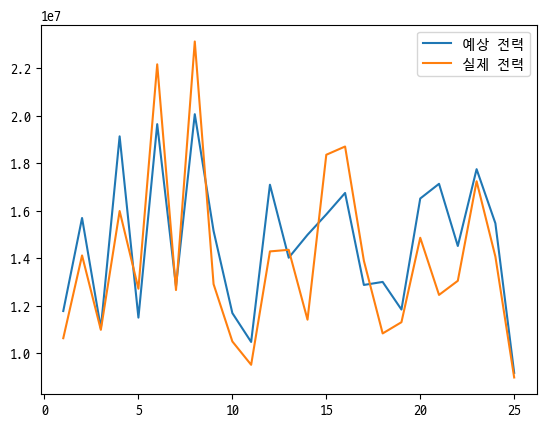

In [129]:
plt.plot(X_num, pred_kwh, label = '예상 전력')
plt.plot(X_num, real_kwh, label = '실제 전력')
plt.legend()
plt.show()